In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

try:
    df = pd.read_csv('student_data.csv')
except FileNotFoundError:
    print("Please upload the 'student_data.csv' file to your Colab environment.")
    # Creating a sample DataFrame for demonstration if the file is not found
    # In a real scenario, you must load the actual dataset.
    data = {'Study_Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7],
            'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25]}
    df = pd.DataFrame(data)

# Display the first few rows and check data information
print("--- Initial Data Snapshot ---")
print(df.head())
print("\n--- Data Information ---")
print(df.info())

Please upload the 'student_data.csv' file to your Colab environment.
--- Initial Data Snapshot ---
   Study_Hours  Scores
0          2.5      21
1          5.1      47
2          3.2      27
3          8.5      75
4          3.5      30

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study_Hours  10 non-null     float64
 1   Scores       10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes
None



--- Missing Values Check ---
Study_Hours    0
Scores         0
dtype: int64


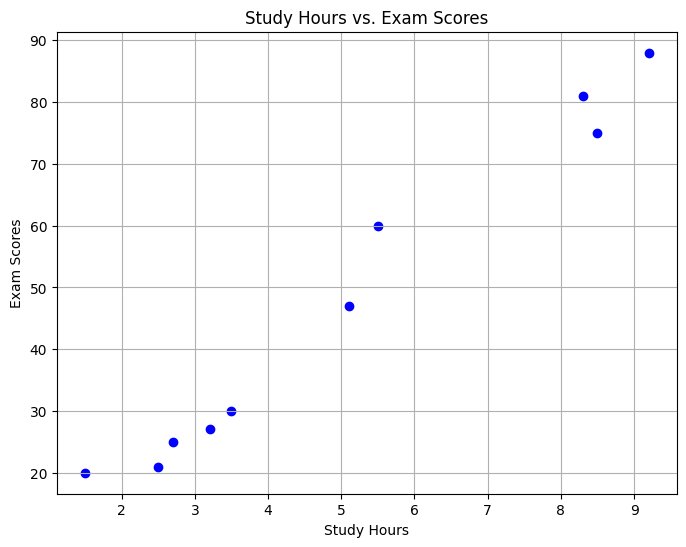

In [2]:
# 2. Data Cleaning and Visualization

# A. Data Cleaning (Checking for missing values)
print("\n--- Missing Values Check ---")
print(df.isnull().sum())
# If there are missing values, you would handle them here (e.g., df.dropna(), df.fillna()).

# B. Basic Visualization
# Assuming the relevant columns are 'Study_Hours' and 'Scores' based on the task description
plt.figure(figsize=(8, 6))
plt.scatter(df['Study_Hours'], df['Scores'], color='blue')
plt.title('Study Hours vs. Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.grid(True)
plt.show()
# This visualization helps confirm the linear relationship expected for linear regression.

In [3]:
# 3. Train the Linear Regression Model

# Define features (X) and target (y)
# Feature: Study_Hours. Target: Scores.
X = df[['Study_Hours']] # Use double brackets to keep X as a DataFrame
y = df['Scores']

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("\n--- Model Training Results ---")
print(f"Intercept (c): {model.intercept_:.2f}")
print(f"Coefficient (m): {model.coef_[0]:.2f}")
# The final equation will be: Scores = (Coefficient * Study_Hours) + Intercept


--- Model Training Results ---
Intercept (c): 0.99
Coefficient (m): 9.24



--- Model Evaluation Metrics ---
Mean Absolute Error (MAE): 2.22
R-squared (R2 Score): 0.9786


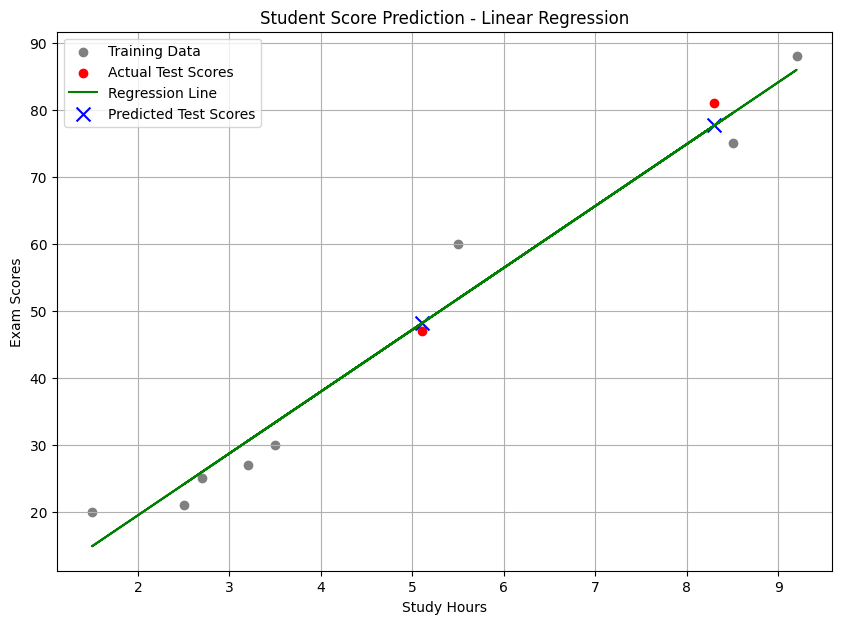

In [4]:
# 4. Prediction and Evaluation

# A. Make predictions on the test set
y_pred = model.predict(X_test)

# B. Evaluate Model Performance
print("\n--- Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R-squared (R2 Score): {r2_score(y_test, y_pred):.4f}")

# C. Visualize Predictions
plt.figure(figsize=(10, 7))

# Plot the training data points
plt.scatter(X_train, y_train, color='gray', label='Training Data')
# Plot the test data points
plt.scatter(X_test, y_test, color='red', label='Actual Test Scores')
# Plot the regression line
plt.plot(X, model.predict(X), color='green', label='Regression Line')
# Plot the predictions on the test set
plt.scatter(X_test, y_pred, color='blue', marker='x', s=100, label='Predicted Test Scores')

plt.title('Student Score Prediction - Linear Regression')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.legend()
plt.grid(True)
plt.show()

--- IQR Outlier Analysis ---
Q1: 2.83, Q3: 7.60, IQR: 4.78
Lower Bound: -4.34, Upper Bound: 14.76
Number of outliers found by IQR: 0


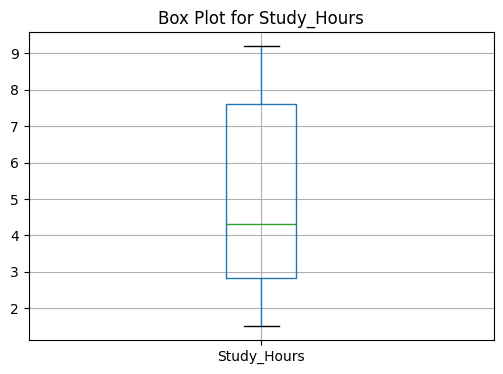

In [5]:
# 1. IQR Method for Outlier Detection

column_name = 'Study_Hours'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

print("--- IQR Outlier Analysis ---")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of outliers found by IQR: {len(outliers_iqr)}")
if not outliers_iqr.empty:
    print("\nOutlier Data Points (IQR Method):")
    print(outliers_iqr)

# Visualization (Box Plot is best for IQR)
plt.figure(figsize=(6, 4))
df.boxplot(column=column_name)
plt.title(f'Box Plot for {column_name}')
plt.show()

In [6]:
# 2. Z-Score Method for Outlier Detection

from scipy import stats

# Calculate the Z-scores for the 'Study_Hours' column
z_scores = np.abs(stats.zscore(df[column_name]))

# Define the threshold (commonly 3)
threshold = 3

# Identify outliers
outliers_zscore = df[z_scores > threshold]

print("\n--- Z-Score Outlier Analysis ---")
print(f"Threshold (Z-score > {threshold}):")
print(f"Number of outliers found by Z-Score: {len(outliers_zscore)}")
if not outliers_zscore.empty:
    print("\nOutlier Data Points (Z-Score Method):")
    print(outliers_zscore)


--- Z-Score Outlier Analysis ---
Threshold (Z-score > 3):
Number of outliers found by Z-Score: 0
